# AUC improved since at least 1 hormone of top 3 hormones and add u'N_pos', u'N_neg', RXCUI

In [1]:
import numpy as np
import pandas as pd
# import sklearn
# from sklearn.metrics import log_loss  
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier                                             
from sklearn.model_selection import KFold     
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('df_preg_hormone_last_numeric2.csv')

print(df.shape)

F:\Users\wudai.BMC\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
F:\Users\wudai.BMC\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


(3628, 33)


In [2]:
# print(df_new.shape)
df.columns

Index([u'y_preg', u'LANGUAGE_CD', u'RACE_CD', u'ZIP_CD', u'N_pos', u'N_neg',
       u'HDID:149', u'HDID:301', u'HDID:2578', u'HDID:292', u'RXCUI:688242',
       u'HDID:50588', u'ICD9:628.9', u'HDID:7177',
       u'SVC:BMC:OB/GYN-FAMILY PLANNING', u'ICD9:628.8', u'ICD9:628.0',
       u'RXCUI:762001', u'ICD9:628.2', u'RXCUI:206101',
       u'INS:ZZINFERTILITY SVC', u'RXCUI:150840', u'ICD9:628.3',
       u'RXCUI:890918', u'ICD9:V26.21', u'BIRTH_DATE', u'AGE_IN_YEARS_NUM',
       u'CLIN:CurrentCigaretteUse-NO', u'CLIN:EverCigaretteUser-YES',
       u'CLIN:CurrentCigaretteUse-YES', u'CLIN:PassiveCigaretteExposure-NO',
       u'CLIN:PassiveCigaretteExposure-YES', u'AGE_Y'],
      dtype='object')

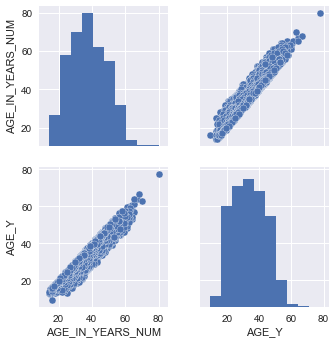

In [3]:
sns.pairplot(df[['AGE_IN_YEARS_NUM', 'AGE_Y']])
plt.show()

# Convert A Categorical Variable Into Dummy Variables

In [4]:
# Create a set of dummy variables from the Categorical variable
# {0: 'DEM|LANGUAGE:ccv', 1: 'DEM|LANGUAGE:creo', 2: 'DEM|LANGUAGE:engl', 3: 'DEM|LANGUAGE:span', 4: 'others'}
col_name=[u'LANGUAGE_CD', u'RACE_CD', u'HDID:2578',u'HDID:50588',u'HDID:7177',u'ICD9:628.9', u'ICD9:628.0', u'ICD9:628.8',u'SVC:BMC:OB/GYN-FAMILY PLANNING', u'RXCUI:762001', u'ICD9:628.2', u'RXCUI:206101',u'INS:ZZINFERTILITY SVC', u'RXCUI:150840', u'ICD9:628.3',u'RXCUI:890918', u'ICD9:V26.21']
df_new =pd.get_dummies(df, prefix=col_name, columns=col_name)
# df_sex = pd.get_dummies(df['LANGUAGE_CD'], columns={'DEM|LANGUAGE:ccv',  'DEM|LANGUAGE:creo',  'DEM|LANGUAGE:engl', 'DEM|LANGUAGE:span',  'DEM|LANGUAGE:others'})
# df_new = pd.concat([df_new, df_sex], axis=1)# axis=0, , ignore_index=True

In [5]:
df_new.columns[df_new.std()<0.01]

F:\Users\wudai.BMC\AppData\Local\Continuum\Anaconda2\lib\site-packages\pandas\core\indexes\base.py:1650: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 62 but corresponding boolean dimension is 61
  result = getitem(key)


Index([], dtype='object')

In [6]:
df_new.drop([u'HDID:149',u'HDID:301',u'HDID:292',], inplace=True, axis=1)

In [7]:
# dropcolumns = ['LANGUAGE_CDcode_0', 'RACE_CDcode_4','ICD9:628.0code_0','ICD9:628.8code_0','ICD9:628.9code_0','SVC:BMC:OB/GYN-FAMILY PLANNINGcode_-1']
dropcolumns = [u'ZIP_CD',u'BIRTH_DATE','AGE_IN_YEARS_NUM', u'RXCUI:890918_False',
       u'RXCUI:150840_True', u'ICD9:628.2_SECONDARY',
       u'RXCUI:150840_False', u'ICD9:628.2_PROBLEM',
       u'ICD9:V26.21_PRIMARY', u'ICD9:628.8_ADMITTING',
       u'ICD9:V26.21_SECONDARY']#
df_new.drop(dropcolumns, inplace=True, axis=1)
df_new.columns

Index([                                                                u'y_preg',
                                                                        u'N_pos',
                                                                        u'N_neg',
                                                                 u'RXCUI:688242',
                                                  u'CLIN:CurrentCigaretteUse-NO',
                                                   u'CLIN:EverCigaretteUser-YES',
                                                 u'CLIN:CurrentCigaretteUse-YES',
                                             u'CLIN:PassiveCigaretteExposure-NO',
                                            u'CLIN:PassiveCigaretteExposure-YES',
                                                                        u'AGE_Y',
                                                 u'LANGUAGE_CD_DEM|LANGUAGE:ccv',
                                                u'LANGUAGE_CD_DEM|LANGUAGE:creo',
                

In [8]:
df.columns[df.isnull().any()].tolist()

['HDID:2578',
 'HDID:50588',
 'ICD9:628.9',
 'HDID:7177',
 'SVC:BMC:OB/GYN-FAMILY PLANNING',
 'ICD9:628.8',
 'ICD9:628.0',
 'ICD9:628.2',
 'INS:ZZINFERTILITY SVC',
 'ICD9:628.3',
 'ICD9:V26.21']

In [9]:
df=df_new#.loc[:, df_new.columns != col_name]

# # df_new.columns.isin(col_name)
# plt.matshow(df.corr())
# plt.show()

In [10]:
df.describe()

,y_preg,N_pos,N_neg,CLIN:CurrentCigaretteUse-NO,CLIN:EverCigaretteUser-YES,CLIN:CurrentCigaretteUse-YES,CLIN:PassiveCigaretteExposure-NO,CLIN:PassiveCigaretteExposure-YES,AGE_Y,LANGUAGE_CD_DEM|LANGUAGE:ccv,...,RXCUI:762001_False,RXCUI:762001_True,ICD9:628.2_PRIMARY,RXCUI:206101_False,RXCUI:206101_True,INS:ZZINFERTILITY SVC_PRIMARY,ICD9:628.3_PRIMARY,ICD9:628.3_SECONDARY,RXCUI:890918_True,ICD9:V26.21_PROBLEM
count,3628.000000,3628.000000,3628.000000,3628.000000,3628.000000,3628.000000,3628.000000,3628.000000,3628.000000,3628.000000,...,3628.000000,3628.000000,3628.000000,3628.000000,3628.000000,3628.000000,3628.000000,3628.000000,3628.000000,3628.000000
mean,-0.765711,0.285832,2.720232,0.856395,0.339305,0.275910,0.222437,0.050992,33.513523,0.027012,...,0.991455,0.008545,0.010474,0.996141,0.003859,0.012955,0.001929,0.003032,0.003859,0.004410
std,0.643273,0.990803,4.092433,0.350737,0.473539,0.447033,0.415940,0.220012,10.275155,0.162141,...,0.092054,0.092054,0.101820,0.062008,0.062008,0.113095,0.043889,0.054987,0.062008,0.066271
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.068493,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.040411,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,33.053425,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,41.465068,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,29.000000,38.000000,1.000000,1.000000,1.000000,1.000000,1.000000,77.495890,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df.groupby('y_preg').mean()

,N_pos,N_neg,RXCUI:688242,CLIN:CurrentCigaretteUse-NO,CLIN:EverCigaretteUser-YES,CLIN:CurrentCigaretteUse-YES,CLIN:PassiveCigaretteExposure-NO,CLIN:PassiveCigaretteExposure-YES,AGE_Y,LANGUAGE_CD_DEM|LANGUAGE:ccv,...,RXCUI:762001_False,RXCUI:762001_True,ICD9:628.2_PRIMARY,RXCUI:206101_False,RXCUI:206101_True,INS:ZZINFERTILITY SVC_PRIMARY,ICD9:628.3_PRIMARY,ICD9:628.3_SECONDARY,RXCUI:890918_True,ICD9:V26.21_PROBLEM
y_preg,,,,,,,,,,,,,,,,,,,,,
-1,0.268186,2.765220,0.005308,0.848267,0.346238,0.282548,0.226350,0.054948,33.656628,0.027474,...,0.990946,0.009054,0.009678,0.996254,0.003746,0.010927,0.001249,0.002185,0.003746,0.002810
1,0.418824,2.381176,0.007059,0.917647,0.287059,0.225882,0.192941,0.021176,32.435017,0.023529,...,0.995294,0.004706,0.016471,0.995294,0.004706,0.028235,0.007059,0.009412,0.004706,0.016471


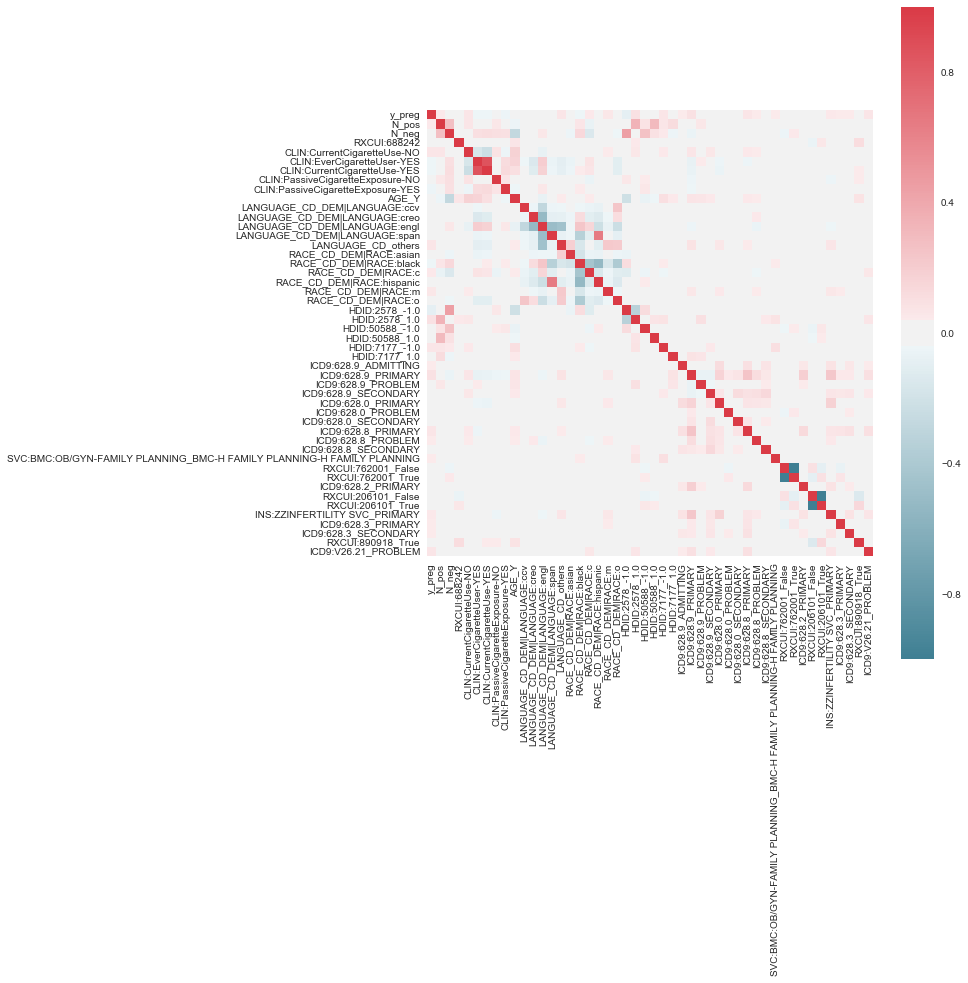

In [12]:
f, ax = plt.subplots(figsize=(10, 12))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

# correlation between y_preg and features

In [13]:
corr['y_preg']

y_preg                                                                    1.000000
N_pos                                                                     0.048900
N_neg                                                                    -0.030183
RXCUI:688242                                                              0.007607
CLIN:CurrentCigaretteUse-NO                                               0.063623
CLIN:EverCigaretteUser-YES                                               -0.040196
CLIN:CurrentCigaretteUse-YES                                             -0.040770
CLIN:PassiveCigaretteExposure-NO                                         -0.025834
CLIN:PassiveCigaretteExposure-YES                                        -0.049371
AGE_Y                                                                    -0.038239
LANGUAGE_CD_DEM|LANGUAGE:ccv                                             -0.007825
LANGUAGE_CD_DEM|LANGUAGE:creo                                             0.002666
LANG

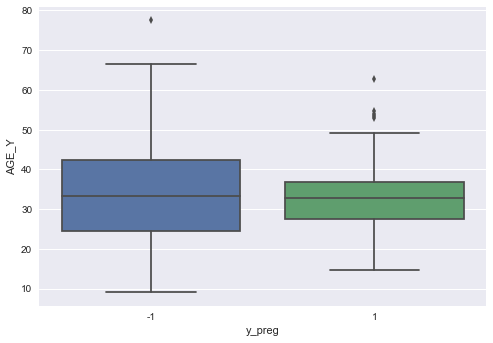

In [14]:
sns.boxplot(x='y_preg',y='AGE_Y',data=df)#,hue='y_preg'
# sns.swarmplot(x='y_preg',y='AGE_Y',data=df)
plt.show()

In [15]:
y=df.y_preg
X=df.loc[:, df.columns != 'y_preg']

# X.head()

In [16]:
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

In [17]:
X_train.shape

(2902, 47)

In [18]:
# if not “balanced”, auc=lower
rf = RandomForestClassifier(n_jobs=-1,n_estimators=500,oob_score=True,max_features="sqrt", random_state=0,class_weight='balanced')
# rf = RandomForestClassifier(n_jobs=-1,n_estimators=500,oob_score=True,max_features=0.2, random_state=0)
rf.fit(X_train, y_train)
y_test_pred = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)#, pos_label=1
auc(fpr, tpr)

0.67310611028874445

In [19]:
# # The “balanced_subsample” mode is the same as “balanced” except that weights are computed based on the bootstrap sample for every tree grown.
# rf = RandomForestClassifier(n_jobs=-1,n_estimators=500,oob_score=True,max_features="sqrt", random_state=0,class_weight='balanced_subsample')
# # rf = RandomForestClassifier(n_jobs=-1,n_estimators=500,oob_score=True,max_features=0.2, random_state=0)
# rf.fit(X_train, y_train)
# y_test_pred = rf.predict_proba(X_test)[:, 1]
# fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)#, pos_label=1
# auc(fpr, tpr)

In [20]:
#,max_depth=3    0.7431
# ,max_depth=4   0.74146
# ,max_depth=5   0.7390
rf = RandomForestClassifier(n_jobs=-1,n_estimators=500,oob_score=True,max_features="sqrt",max_depth=3, random_state=0,class_weight='balanced')
# rf = RandomForestClassifier(n_jobs=-1,n_estimators=500,oob_score=True,max_features=0.2,max_depth=3, random_state=0)
rf.fit(X_train, y_train)
y_test_pred = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)#, pos_label=1
auc(fpr, tpr)

0.71336356311716542

In [21]:
rf = RandomForestClassifier(n_jobs=-1,n_estimators=500,oob_score=True,max_features=0.6,max_depth=3, random_state=0,class_weight='balanced')
rf.fit(X_train, y_train)
y_test_pred = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)#, pos_label=1
auc(fpr, tpr)

0.72975884876988506

In [22]:
clf =RandomForestClassifier(n_jobs=-1,n_estimators=500,oob_score=True, random_state=0,class_weight='balanced')# RandomForest() 
param_grid = {
                 'max_features': [0.2, 0.3, 0.4, 0.5,0.6,"sqrt"],
                 'max_depth': [3,4,5]
             }
from sklearn.grid_search import GridSearchCV

grid_clf = GridSearchCV(clf, param_grid, cv=3,scoring="roc_auc")
grid_clf.fit(X_train, y_train)
print(grid_clf. best_params_)
print(grid_clf. grid_scores_)

{'max_features': 0.3, 'max_depth': 3}
[mean: 0.72239, std: 0.01470, params: {'max_features': 0.2, 'max_depth': 3}, mean: 0.72437, std: 0.01403, params: {'max_features': 0.3, 'max_depth': 3}, mean: 0.72248, std: 0.01485, params: {'max_features': 0.4, 'max_depth': 3}, mean: 0.72101, std: 0.01539, params: {'max_features': 0.5, 'max_depth': 3}, mean: 0.72194, std: 0.01312, params: {'max_features': 0.6, 'max_depth': 3}, mean: 0.71915, std: 0.01980, params: {'max_features': 'sqrt', 'max_depth': 3}, mean: 0.72249, std: 0.01412, params: {'max_features': 0.2, 'max_depth': 4}, mean: 0.72292, std: 0.01505, params: {'max_features': 0.3, 'max_depth': 4}, mean: 0.71983, std: 0.01281, params: {'max_features': 0.4, 'max_depth': 4}, mean: 0.72072, std: 0.01465, params: {'max_features': 0.5, 'max_depth': 4}, mean: 0.72034, std: 0.01330, params: {'max_features': 0.6, 'max_depth': 4}, mean: 0.71869, std: 0.01793, params: {'max_features': 'sqrt', 'max_depth': 4}, mean: 0.71883, std: 0.01427, params: {'max_

In [23]:
# rf = RandomForestClassifier(n_jobs=-1,n_estimators=500,oob_score=True,max_features=0.2,max_depth=3, random_state=0,class_weight='balanced')
# # rf = RandomForestClassifier(n_jobs=-1,n_estimators=500,oob_score=True,max_features=0.2,max_depth=3, random_state=0)
# rf.fit(X_train, y_train)
# y_test_pred = rf.predict_proba(X_test)[:, 1]
# fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)#, pos_label=1
# auc(fpr, tpr)

In [24]:
grid_clf. best_params_['max_depth']

3

In [25]:
rf = RandomForestClassifier(n_jobs=-1,n_estimators=500,oob_score=True,max_features=grid_clf. best_params_['max_features'],max_depth=grid_clf. best_params_['max_depth'], random_state=0,class_weight='balanced')
# rf = RandomForestClassifier(n_jobs=-1,n_estimators=500,oob_score=True,max_features=0.2,max_depth=3, random_state=0)
rf.fit(X_train, y_train)
y_test_pred = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)#, pos_label=1
auc(fpr, tpr)

0.72127077516910565

In [26]:
oob_error = 1 - rf.oob_score_
print(oob_error)

0.389731219848


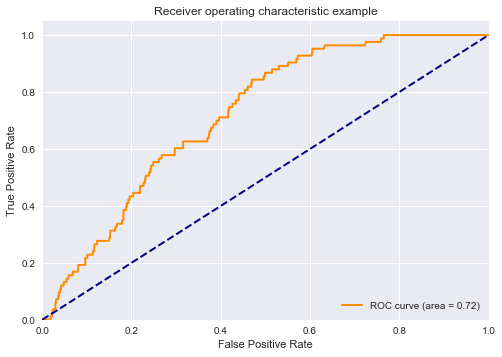

In [27]:
roc_auc=auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# View Feature Importance


In [28]:
# list(zip(X.columns, rf.feature_importances_))#.to_frame()

importances=pd.DataFrame(zip(X.columns, rf.feature_importances_))

importances.columns=['name','importances']

importances.sort_values(by=['importances'], ascending=[False])#

,name,importances
8,AGE_Y,0.512792
0,N_pos,0.084397
20,HDID:2578_-1.0,0.079797
21,HDID:2578_1.0,0.040650
27,ICD9:628.9_PRIMARY,0.034541
1,N_neg,0.031481
7,CLIN:PassiveCigaretteExposure-YES,0.027324
3,CLIN:CurrentCigaretteUse-NO,0.024954
13,LANGUAGE_CD_others,0.021805
33,ICD9:628.8_PRIMARY,0.013848


In [29]:
importances.sort_values(by=['importances'], ascending=[False])['name'].values

array(['AGE_Y', 'N_pos', u'HDID:2578_-1.0', u'HDID:2578_1.0',
       u'ICD9:628.9_PRIMARY', 'N_neg', 'CLIN:PassiveCigaretteExposure-YES',
       'CLIN:CurrentCigaretteUse-NO', u'LANGUAGE_CD_others',
       u'ICD9:628.8_PRIMARY', u'LANGUAGE_CD_DEM|LANGUAGE:span',
       u'RACE_CD_DEM|RACE:c', u'RACE_CD_DEM|RACE:black',
       u'SVC:BMC:OB/GYN-FAMILY PLANNING_BMC-H FAMILY PLANNING-H FAMILY PLANNING',
       u'HDID:7177_-1.0', u'ICD9:628.8_PROBLEM',
       'CLIN:PassiveCigaretteExposure-NO', u'ICD9:628.3_PRIMARY',
       u'INS:ZZINFERTILITY SVC_PRIMARY', u'ICD9:628.9_PROBLEM',
       u'RACE_CD_DEM|RACE:hispanic', 'CLIN:CurrentCigaretteUse-YES',
       'CLIN:EverCigaretteUser-YES', u'LANGUAGE_CD_DEM|LANGUAGE:engl',
       u'RACE_CD_DEM|RACE:m', u'ICD9:628.0_PROBLEM', u'RXCUI:206101_False',
       u'ICD9:628.0_PRIMARY', u'RXCUI:206101_True', u'ICD9:628.2_PRIMARY',
       u'ICD9:628.0_SECONDARY', u'HDID:50588_-1.0',
       u'RACE_CD_DEM|RACE:asian', 'RXCUI:688242', u'ICD9:628.9_ADMITTING',
 